In [1]:
# Import packages

# **Regression Models** #
%matplotlib inline
#%matplotlib widget
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor,
RandomForestRegressor, VotingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor)

# Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures

# model_selection
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, 
learning_curve, cross_val_predict, cross_validate, permutation_test_score, validation_curve, RandomizedSearchCV)

# Metrics
from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report)

# Display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [2]:
df = pd.read_csv('ai_job_dataset.csv', engine='pyarrow')

In [3]:
df.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [4]:
# Check for duplicates
df['job_id'].duplicated().sum() 

0

In [5]:
df = df.drop(columns=['job_id', 'salary_currency', 'posting_date', 'application_deadline',
                          'job_description_length', 'employment_type', 'required_skills', 
                          'remote_ratio'], axis=1)

In [6]:
# Data Integrity Check
print("Big Query Statistics:")
print('-' * 127)
print(f"🚣‍♀️ DataFrame Shape: {df.shape}")
print('-' * 127)
print(f"Columns to list:\n{df.columns.tolist()}")
print('-' * 127)
print(f"📊 DataFrame Info: {df.info(memory_usage='deep')}")
print('-' * 127)
print(f"📈 DataFrame Distribution:\n {df.describe()}")
print('-' * 127)

missing_values = df.isna().sum()

if len(missing_values) < 0:
    print("❌ Missing data for following columns:")
else:
    print(f"✅ No missing values for df:\n{missing_values}")

Big Query Statistics:
-------------------------------------------------------------------------------------------------------------------------------
🚣‍♀️ DataFrame Shape: (15000, 11)
-------------------------------------------------------------------------------------------------------------------------------
Columns to list:
['job_title', 'salary_usd', 'experience_level', 'company_location', 'company_size', 'employee_residence', 'education_required', 'years_experience', 'industry', 'benefits_score', 'company_name']
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_title           15000 non-null  object 
 1   salary_usd          15000 non-null  int64  
 2   experience_level    15000 non-null  obj

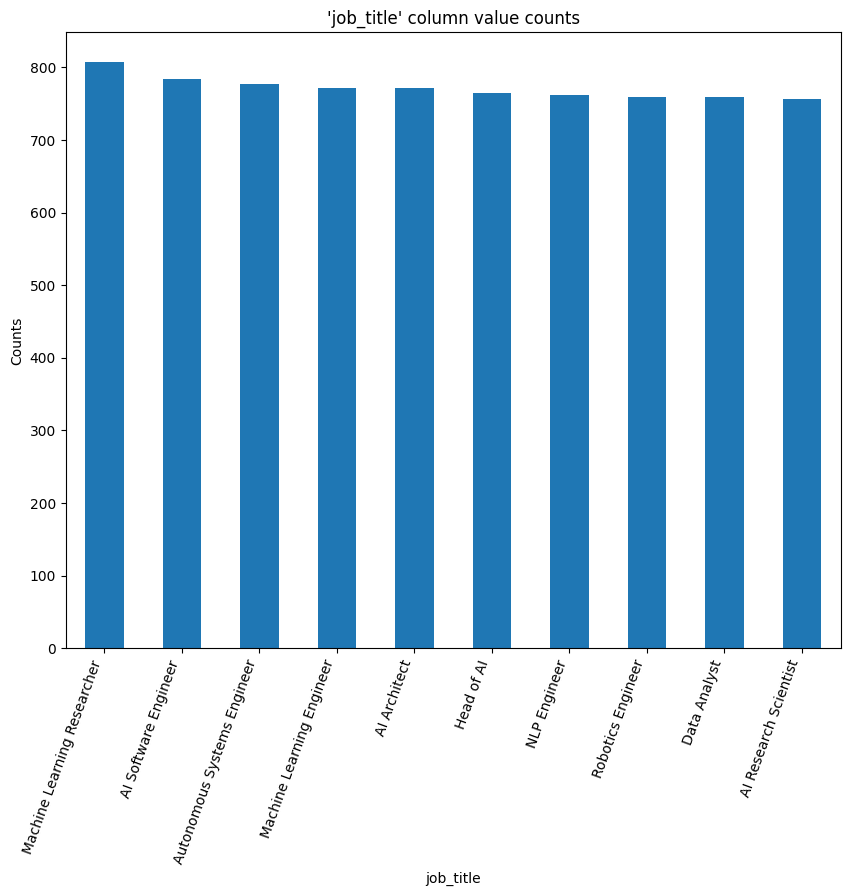

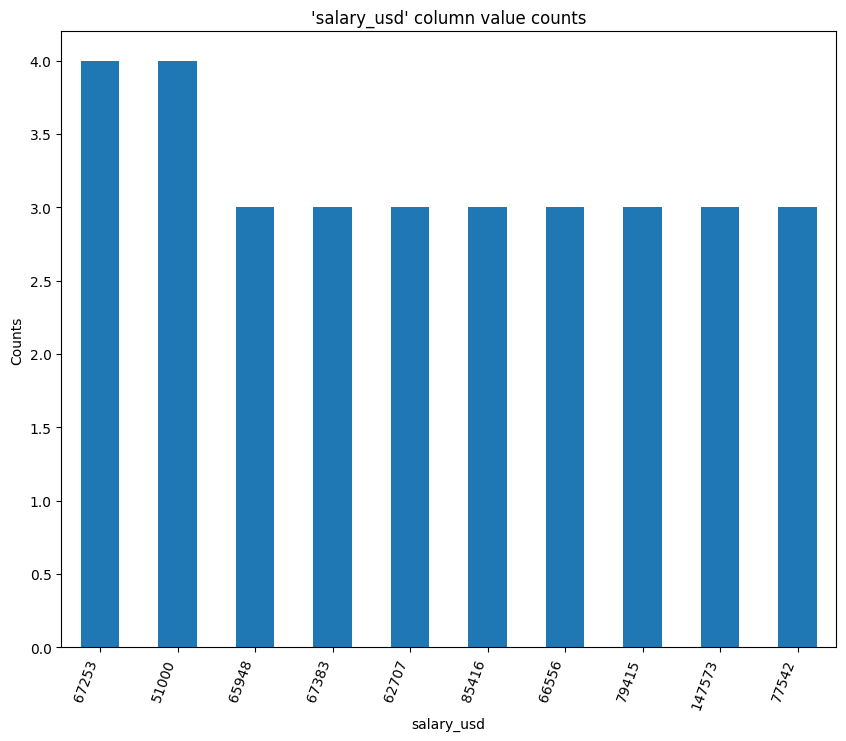

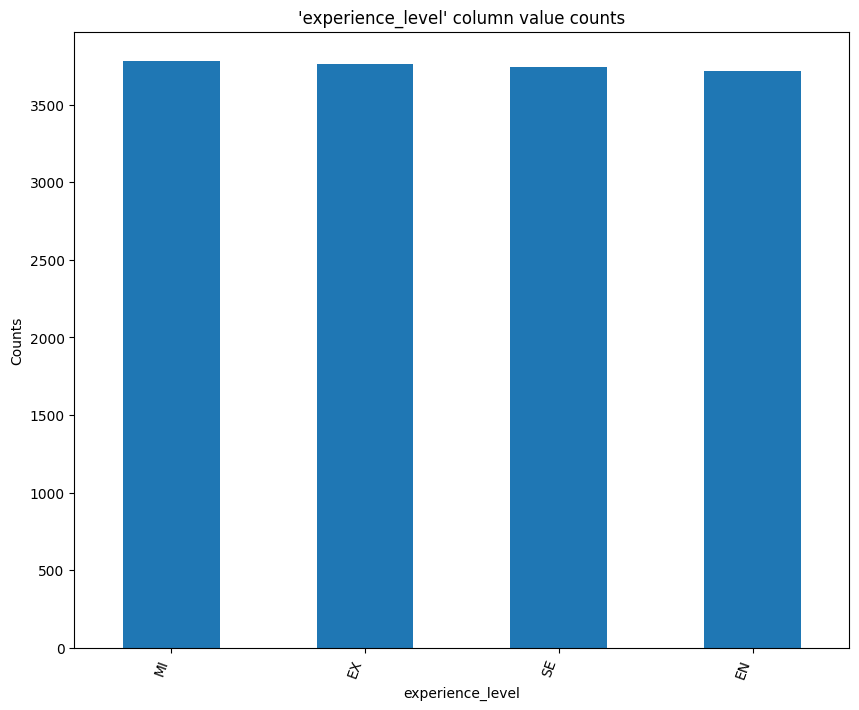

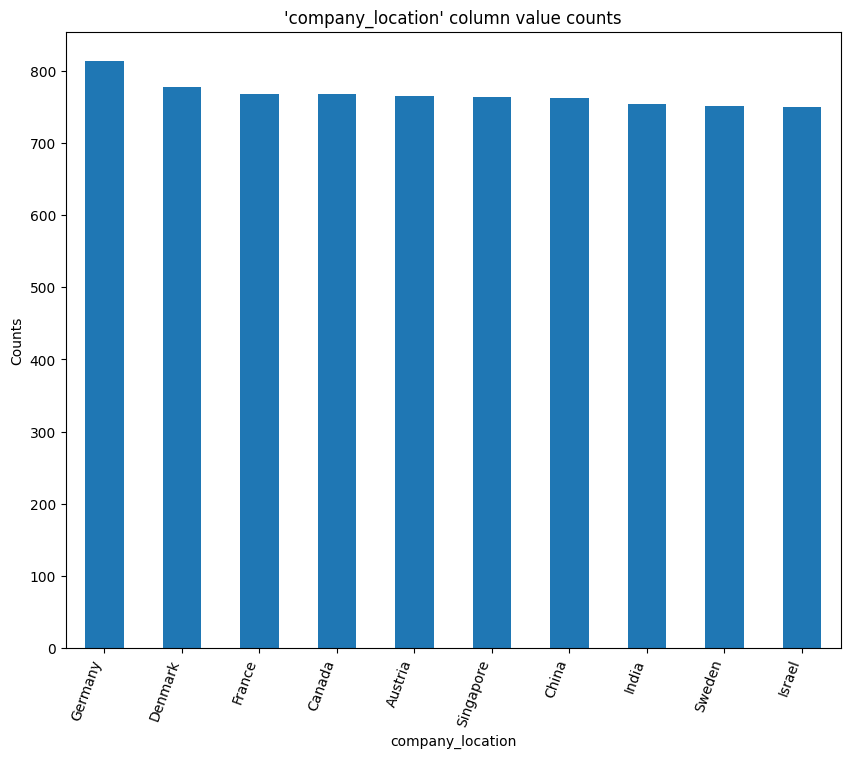

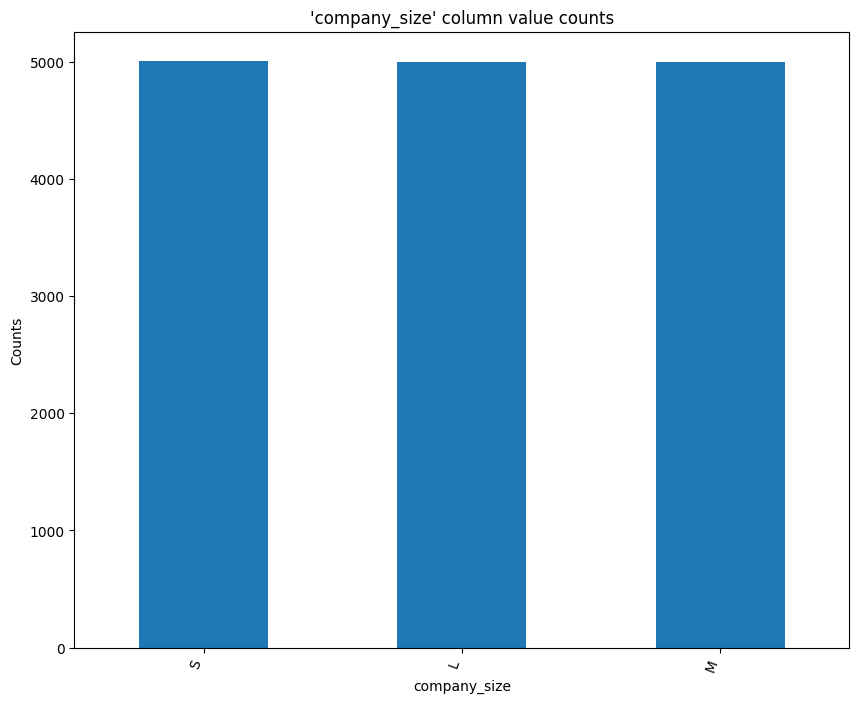

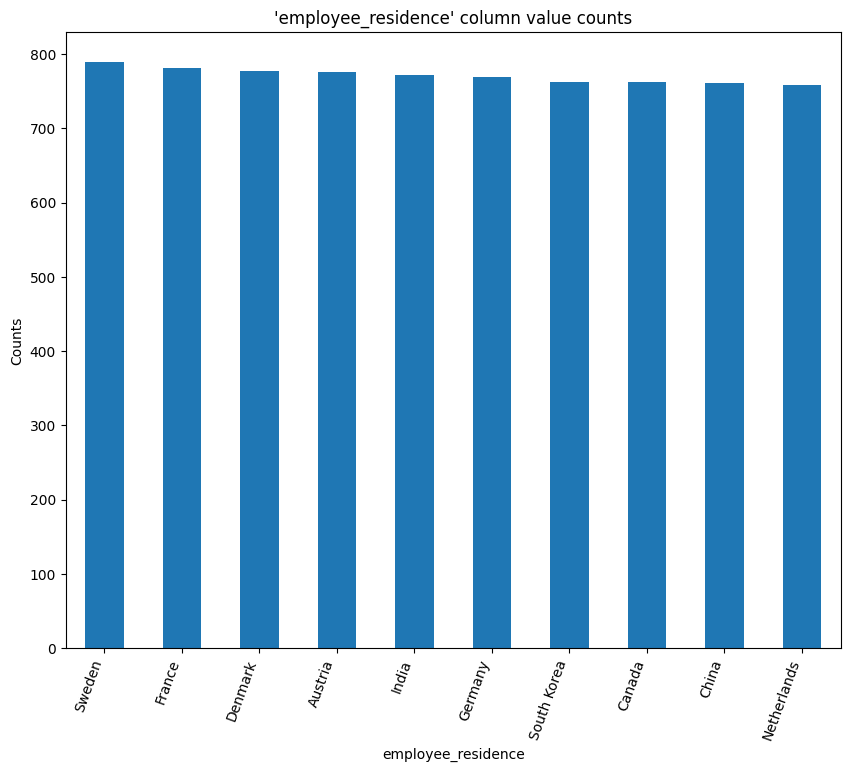

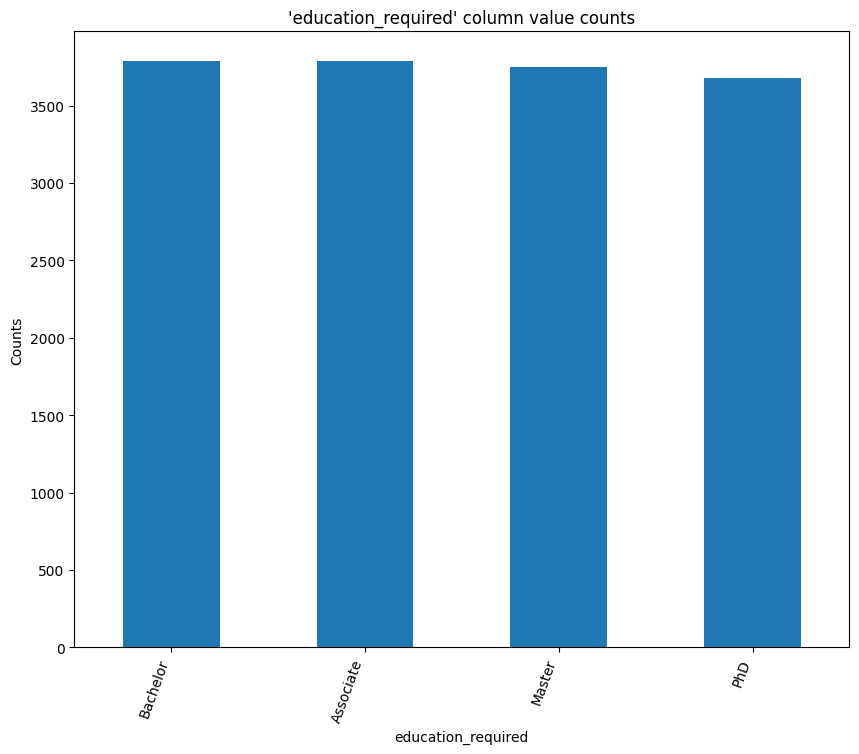

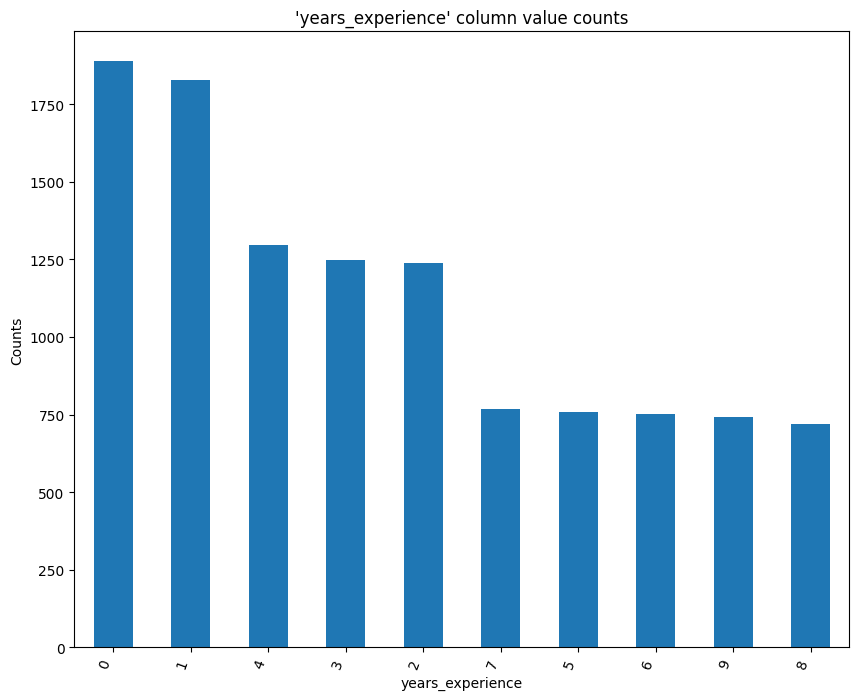

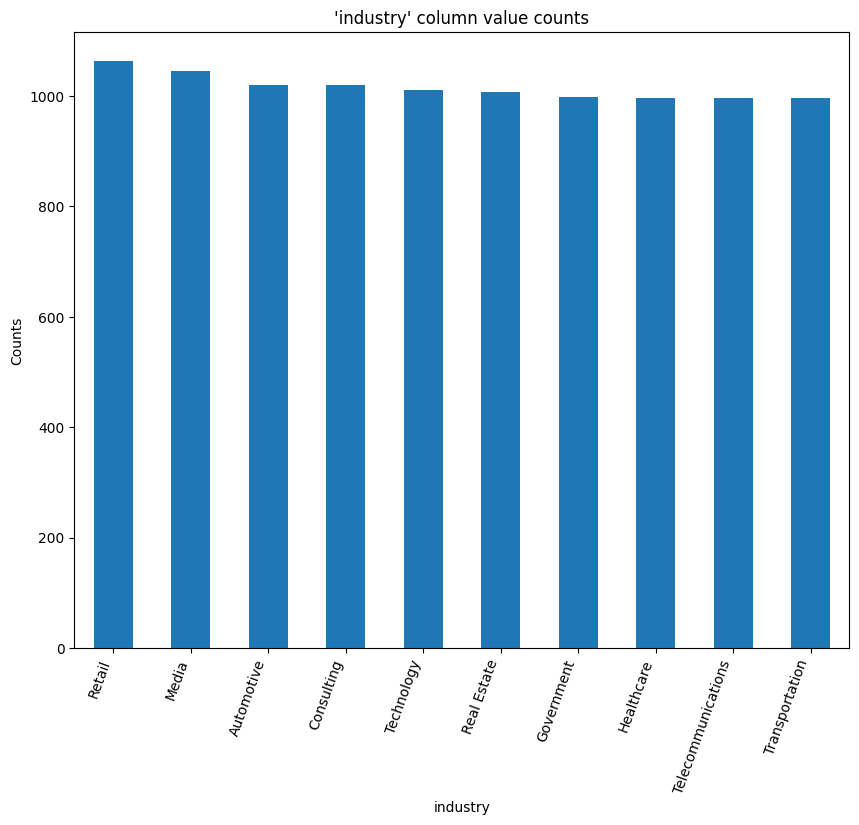

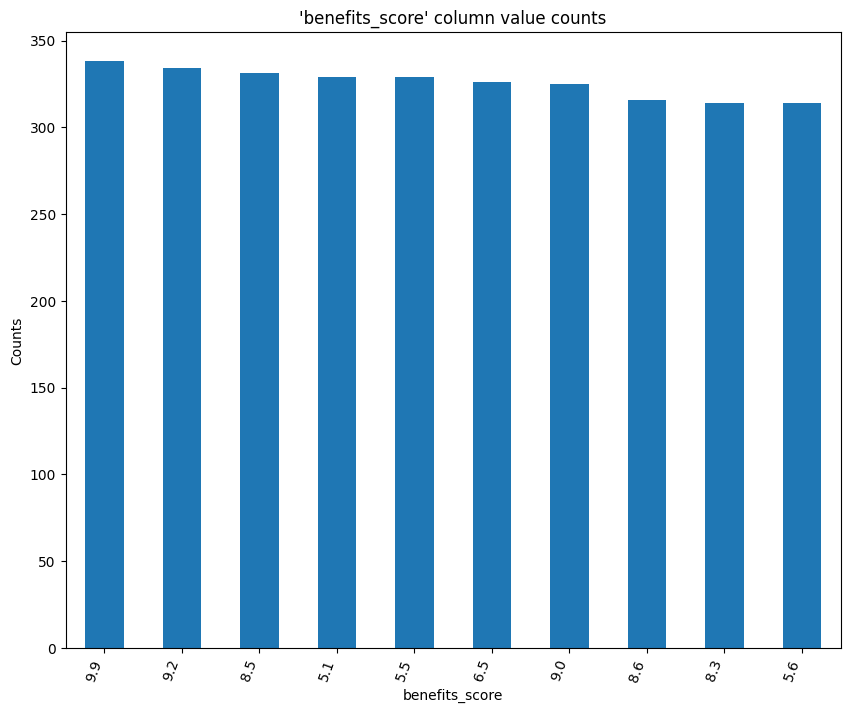

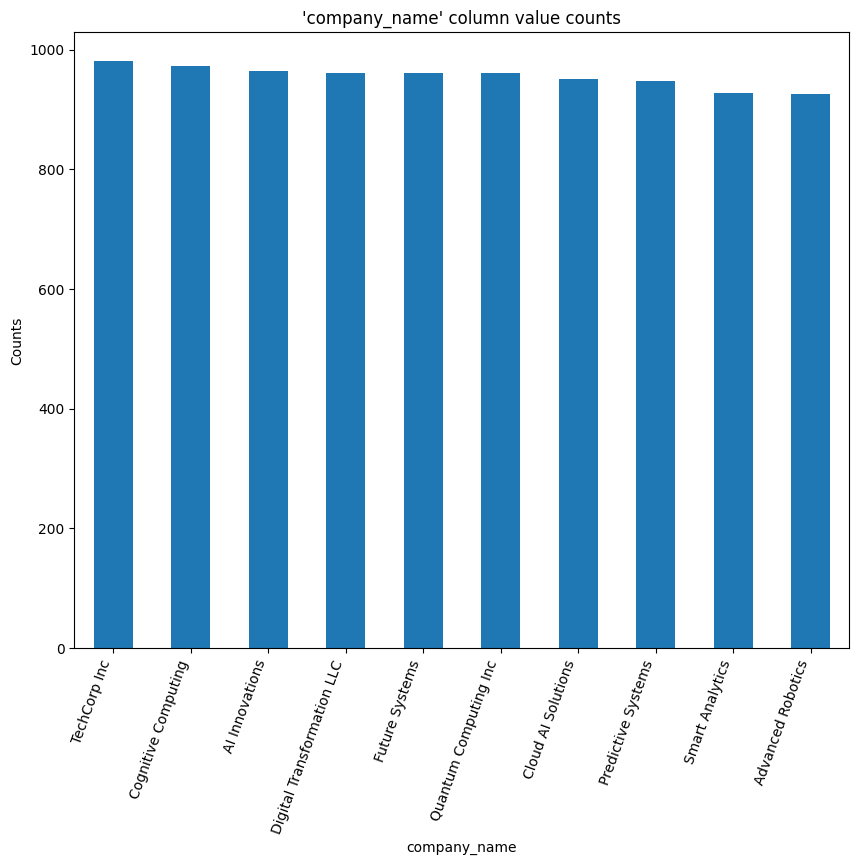

In [7]:
# Data Distribution
# Exploratory Data Analysis
def eda_plot(column, topn=10):
    plt.figure(figsize=(10, 8))
    df[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"'{column}' column value counts")
    plt.ylabel("Counts")
    plt.xticks(rotation = 70, ha='right')
    plt.show()

columns = df.columns

for column in columns:
    eda_plot(column)

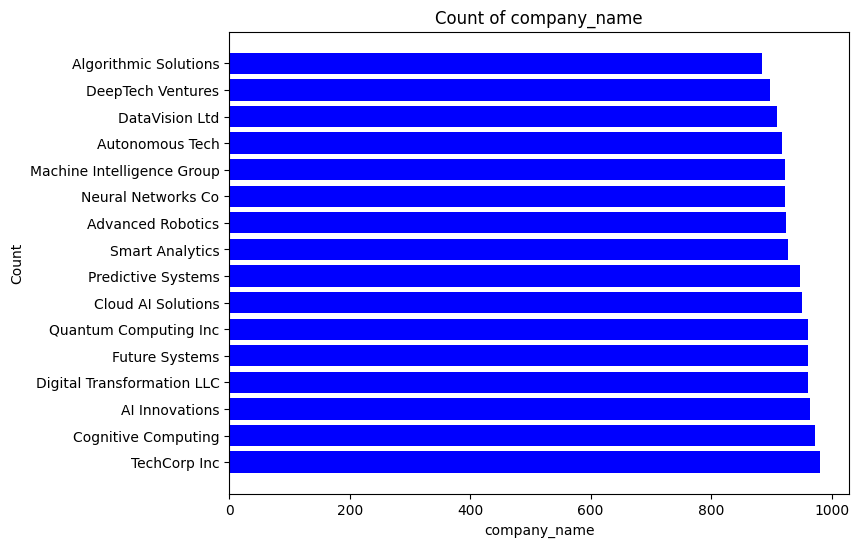

In [10]:
# 1. Bar Plot for evaluating the count
exp_level = df['company_name'].value_counts()
plt.figure(figsize=(8, 6))
plt.barh(exp_level.index, exp_level, color='blue')
plt.title('Count of company_name')
plt.xlabel('company_name')
plt.ylabel('Count')
#plt.xticks(rotation=90)
plt.show()

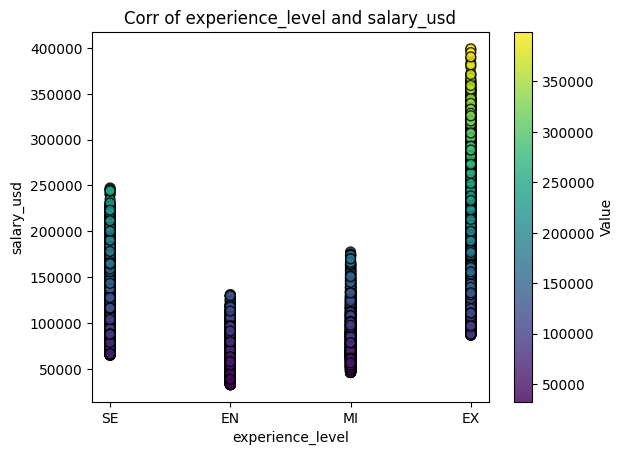

In [12]:
# Create data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.exp(-0.1*x) * np.sin(x)
categories = ['A', 'B', 'C', 'D', 'E']
values = [25, 40, 30, 55, 15] 

# Example Scatter plot (plt.scatter)
plt.subplot(1, 1, 1)
plt.scatter(data=df, x='experience_level', y='salary_usd', c=df['salary_usd'],
            cmap='viridis', s=50, alpha=0.8, edgecolors='k')
plt.title('Corr of experience_level and salary_usd')
plt.xlabel('experience_level')
plt.ylabel('salary_usd')
plt.colorbar(label='Value')
plt.show();

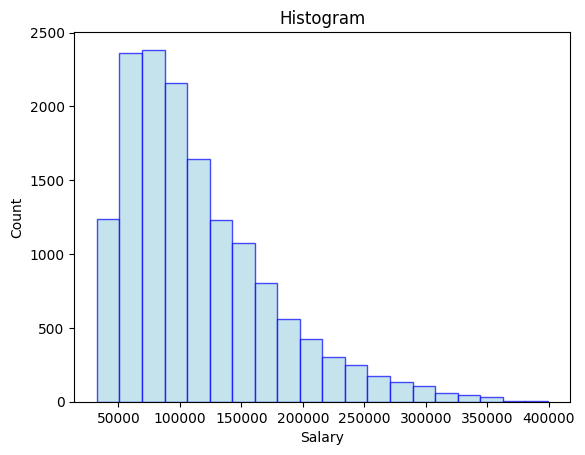

In [13]:
# Example Histogram (plt.hist)
plt.subplot(1, 1, 1)
#data = np.random.normal(0, 1, 1000)
plt.hist(data=df, x='salary_usd', bins=20, 
         color='lightblue', edgecolor='blue', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show();

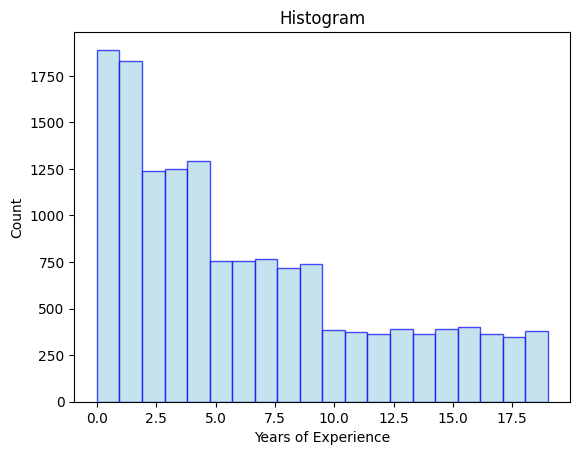

In [14]:
# Example Histogram (plt.hist)
plt.subplot(1, 1, 1)
#data = np.random.normal(0, 1, 1000)
plt.hist(data=df, x='years_experience', bins=20, 
         color='lightblue', edgecolor='blue', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Years of Experience')
plt.ylabel('Count');

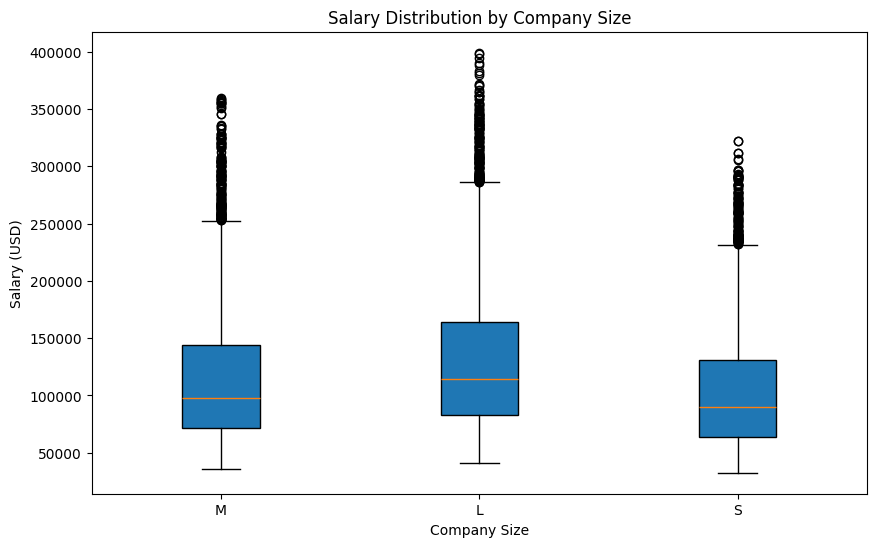

In [15]:
# Method 1: Using pandas groupby (recommended)
plt.figure(figsize=(10, 6))
data_grouped = [df[df['company_size'] == size]['salary_usd'] for size in df['company_size'].unique()]
plt.boxplot(data_grouped, tick_labels=df['company_size'].unique(), patch_artist=True)
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary (USD)')
plt.show()

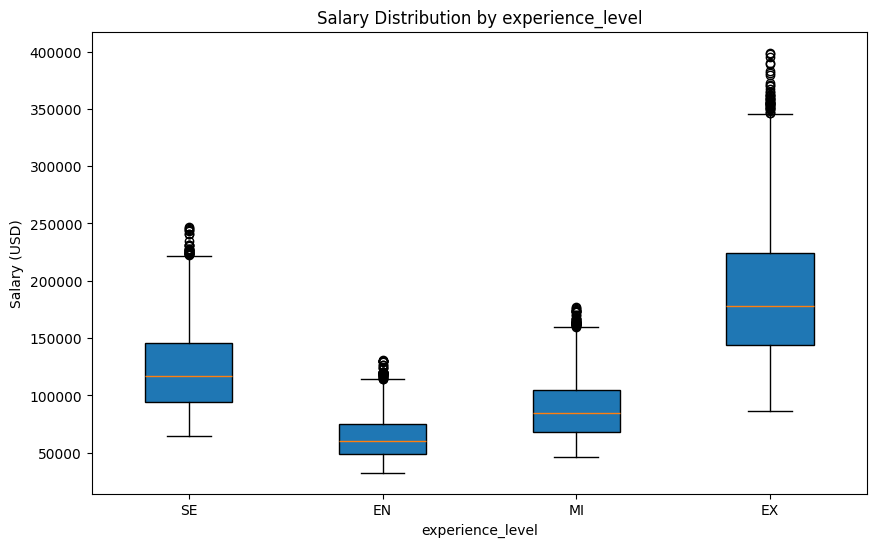

In [16]:
# Method 1: Using pandas groupby (recommended)
plt.figure(figsize=(10, 6))
data_grouped = [df[df['experience_level'] == size]['salary_usd'] for size in df['experience_level'].unique()]
plt.boxplot(data_grouped, tick_labels=df['experience_level'].unique(), patch_artist=True)
plt.title('Salary Distribution by experience_level')
plt.xlabel('experience_level')
plt.ylabel('Salary (USD)')
plt.show()

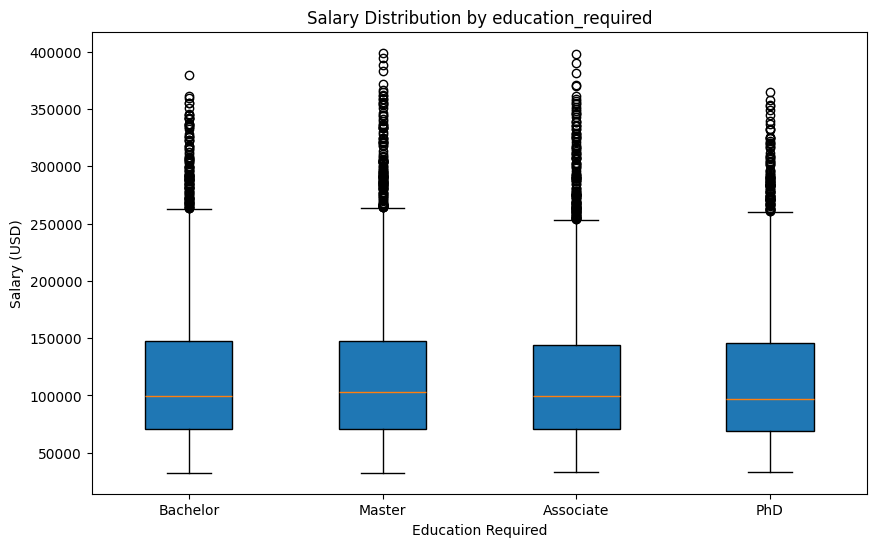

In [17]:
# Method 1: Using pandas groupby (recommended)
plt.figure(figsize=(10, 6))
data_grouped = [df[df['education_required'] == size]['salary_usd'] for size in df['education_required'].unique()]
plt.boxplot(data_grouped, tick_labels=df['education_required'].unique(), patch_artist=True)
plt.title('Salary Distribution by education_required')
plt.xlabel('Education Required')
plt.ylabel('Salary (USD)')
plt.show()

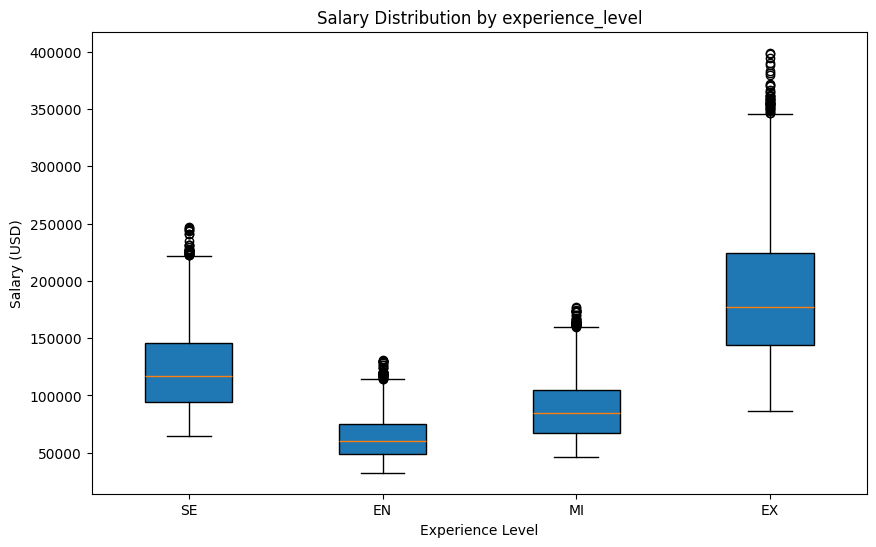

In [18]:
# Method 1: Using pandas groupby (recommended)
plt.figure(figsize=(10, 6))
data_grouped = [df[df['experience_level'] == size]['salary_usd'] for size in df['experience_level'].unique()]
plt.boxplot(data_grouped, tick_labels=df['experience_level'].unique(), patch_artist=True)
plt.title('Salary Distribution by experience_level')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

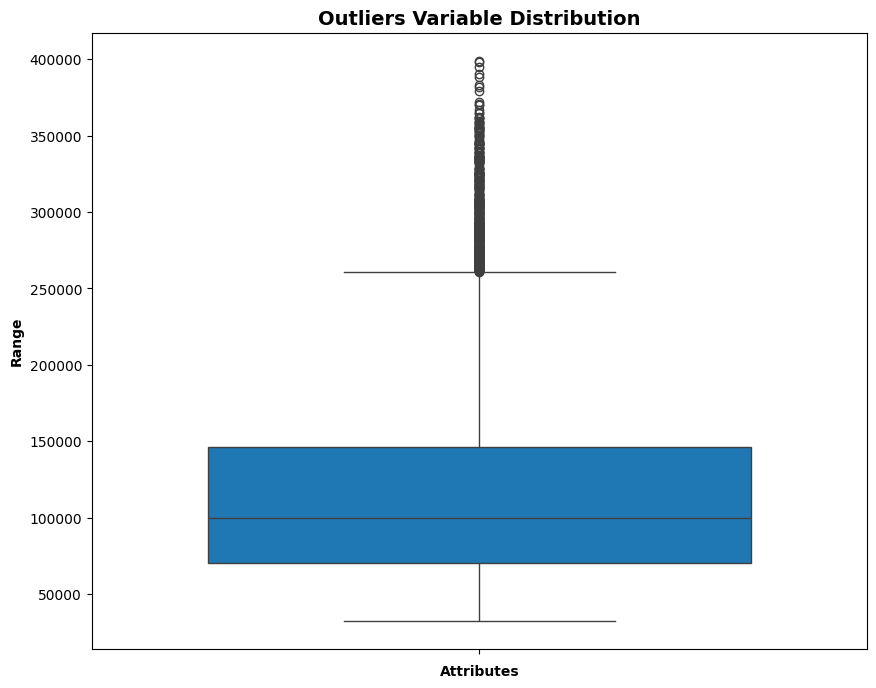

In [19]:
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df['salary_usd'], orient="v", 
            whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold');

In [28]:
Q1 = df.salary_usd.quantile(0.25)
Q3 = df.salary_usd.quantile(0.75)
IQR = Q3 - Q1
print(f"Shape {df.shape} with Outliers")
df = df[(df.salary_usd >= Q1 - 1.5 * IQR) & (df.salary_usd <= Q3 + 1.5 * IQR)]
print(f"Shape {df.shape} without Outliers")

Shape (14289, 11) with Outliers
Shape (14289, 11) without Outliers


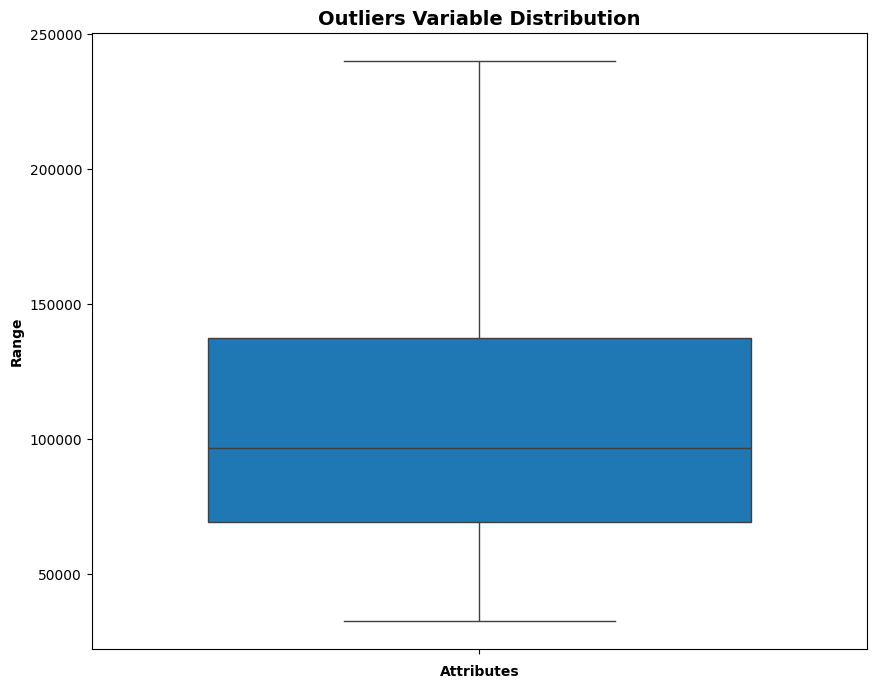

In [30]:
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = df['salary_usd'], orient="v", 
            whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold');

In [31]:
df.head()

,job_title,salary_usd,experience_level,company_location,company_size,employee_residence,education_required,years_experience,industry,benefits_score,company_name
0,AI Research Scientist,90376,SE,China,M,China,Bachelor,9,Automotive,5.9,Smart Analytics
1,AI Software Engineer,61895,EN,Canada,M,Ireland,Master,1,Media,5.2,TechCorp Inc
2,AI Specialist,152626,MI,Switzerland,L,South Korea,Associate,2,Education,9.4,Autonomous Tech
3,NLP Engineer,80215,SE,India,M,India,PhD,7,Consulting,8.6,Future Systems
4,AI Consultant,54624,EN,France,S,Singapore,Master,0,Media,6.6,Advanced Robotics


In [83]:
#new_df['job_title'].unique()

In [32]:
df['job_title'].value_counts()

job_title
Machine Learning Researcher    765
Autonomous Systems Engineer    754
AI Software Engineer           749
NLP Engineer                   732
Data Analyst                   731
Machine Learning Engineer      729
Head of AI                     729
AI Architect                   725
Robotics Engineer              723
Data Engineer                  715
AI Product Manager             712
AI Research Scientist          711
Research Scientist             700
Principal Data Scientist       696
ML Ops Engineer                694
Computer Vision Engineer       691
Deep Learning Engineer         685
AI Specialist                  685
AI Consultant                  683
Data Scientist                 680
Name: count, dtype: int64

In [33]:
#df.loc[df['job_title'].str.contains('Engineer', case=False, na=False), 'job_title'].value_counts()

In [34]:
#df.loc[df['job_title'].str.contains(
#    'Engineer', case=False, na=False), 'job_title'].value_counts()

In [35]:
# filtering first
data_scientist_titles = df.loc[df['job_title'].str.contains(
    'Data Scientist|Research Scientist', case=False, na=False), 'job_title']
    
machine_learning_titles = df.loc[df['job_title'].str.contains(
    'Machine Learning|ML', case=False, na=False), 'job_title'] 

ai_jobs_titles = df.loc[df['job_title'].str.contains(
    'AI', case=False, na=False), 'job_title'] 

data_analyst_titles = df.loc[df['job_title'].str.contains(
    'Analyst', case=False, na=False), 'job_title'] 
    
data_engineer_titles = df.loc[df['job_title'].str.contains(
    'Engineer', case=False, na=False), 'job_title']

In [36]:
data_analyst_titles.value_counts()

job_title
Data Analyst    731
Name: count, dtype: int64

In [37]:
data_engineer_titles.unique()

array(['AI Software Engineer', 'NLP Engineer',
       'Autonomous Systems Engineer', 'Machine Learning Engineer',
       'Data Engineer', 'ML Ops Engineer', 'Robotics Engineer',
       'Deep Learning Engineer', 'Computer Vision Engineer'], dtype=object)

In [38]:
data_scientist_titles.value_counts()

job_title
AI Research Scientist       711
Research Scientist          700
Principal Data Scientist    696
Data Scientist              680
Name: count, dtype: int64

In [39]:
machine_learning_titles.value_counts()

job_title
Machine Learning Researcher    765
Machine Learning Engineer      729
ML Ops Engineer                694
Name: count, dtype: int64

In [40]:
ai_jobs_titles.unique()

array(['AI Research Scientist', 'AI Software Engineer', 'AI Specialist',
       'AI Consultant', 'AI Architect', 'AI Product Manager',
       'Head of AI'], dtype=object)

In [107]:
#ai_jobs_titles.unique()

In [41]:
#df.loc[df['job_title'].str.contains(
#    'Scientist', case=False, na=False), 'job_title'].value_counts()

In [42]:
#plt.figure(figsize=(10,5))
#df['job_title'].value_counts().plot(kind='bar');

In [43]:
# Function to perform filtering
def segment_job_title(job_title):
    
    data_scientist_titles = ['Principal Data Scientist', 'Research Scientist', 'Data Scientist']
    
    machine_learning_titles = ['Machine Learning Engineer', 'ML Ops Engineer', 'Machine Learning Researcher']
    
    data_analyst_titles = ['Data Analyst']
    
    data_engineer_titles = ['NLP Engineer', 'Autonomous Systems Engineer',
                            'Data Engineer', 'Robotics Engineer', 'Deep Learning Engineer',
                            'Computer Vision Engineer']
    
    ai_jobs_titles = ['AI Research Scientist', 'AI Software Engineer', 'AI Specialist', 
                      'AI Consultant', 'AI Architect', 'AI Product Manager', 'Head of AI']

    if job_title in data_scientist_titles:
        return 'Data Scientist'
    elif job_title in machine_learning_titles:
        return 'Machine Learning Engineer'
    elif job_title in data_analyst_titles:
        return 'Data Analyst'
    elif job_title in data_engineer_titles:
        return 'Data Engineer'
    elif job_title in ai_jobs_titles:
        return 'AI Jobs'
    else:
        return 'Uncategorized'

In [66]:
#new_df['job_title'].apply(segment_job_title)

In [44]:
# Apply the function
df['job_title'] = df['job_title'].apply(segment_job_title)

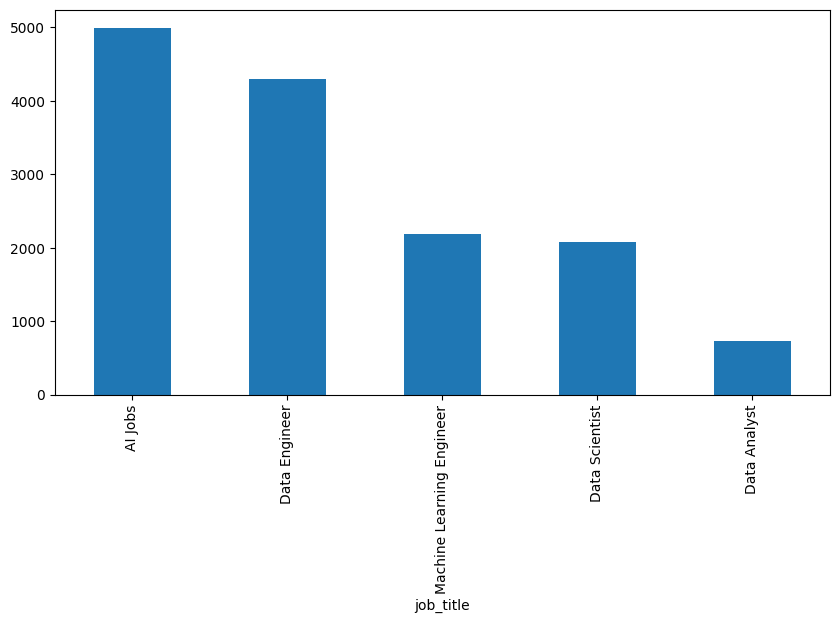

In [45]:
plt.figure(figsize=(10,5))
df['job_title'].value_counts().plot(kind='bar');

In [46]:
df.head()

,job_title,salary_usd,experience_level,company_location,company_size,employee_residence,education_required,years_experience,industry,benefits_score,company_name
0,AI Jobs,90376,SE,China,M,China,Bachelor,9,Automotive,5.9,Smart Analytics
1,AI Jobs,61895,EN,Canada,M,Ireland,Master,1,Media,5.2,TechCorp Inc
2,AI Jobs,152626,MI,Switzerland,L,South Korea,Associate,2,Education,9.4,Autonomous Tech
3,Data Engineer,80215,SE,India,M,India,PhD,7,Consulting,8.6,Future Systems
4,AI Jobs,54624,EN,France,S,Singapore,Master,0,Media,6.6,Advanced Robotics


In [47]:
df['company_name'].unique()

array(['Smart Analytics', 'TechCorp Inc', 'Autonomous Tech',
       'Future Systems', 'Advanced Robotics', 'Neural Networks Co',
       'DataVision Ltd', 'Cloud AI Solutions', 'Quantum Computing Inc',
       'Predictive Systems', 'AI Innovations', 'Algorithmic Solutions',
       'Cognitive Computing', 'DeepTech Ventures',
       'Machine Intelligence Group', 'Digital Transformation LLC'],
      dtype=object)

### Preprocessing

In [48]:
df.select_dtypes('object').columns

Index(['job_title', 'experience_level', 'company_location', 'company_size',
       'employee_residence', 'education_required', 'industry', 'company_name'],
      dtype='object')

In [49]:
# Option 2: Use a loop for multiple columns
categorical_cols = ['job_title', 'experience_level', 'company_location', 'company_size', 
                    'employee_residence', 'education_required', 'industry', 
                    'company_name']
label_encoders = {} 

for col in categorical_cols: 
    le = LabelEncoder() 
    df[f'{col}_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoder for potential inverse transform

In [50]:
df.head()

,job_title,salary_usd,experience_level,company_location,company_size,employee_residence,education_required,years_experience,industry,benefits_score,company_name,job_title_encoded,experience_level_encoded,company_location_encoded,company_size_encoded,employee_residence_encoded,education_required_encoded,industry_encoded,company_name_encoded
0,AI Jobs,90376,SE,China,M,China,Bachelor,9,Automotive,5.9,Smart Analytics,0,3,3,1,3,1,0,14
1,AI Jobs,61895,EN,Canada,M,Ireland,Master,1,Media,5.2,TechCorp Inc,0,0,2,1,9,2,9,15
2,AI Jobs,152626,MI,Switzerland,L,South Korea,Associate,2,Education,9.4,Autonomous Tech,0,2,17,0,15,0,2,3
3,Data Engineer,80215,SE,India,M,India,PhD,7,Consulting,8.6,Future Systems,2,3,8,1,8,3,1,9
4,AI Jobs,54624,EN,France,S,Singapore,Master,0,Media,6.6,Advanced Robotics,0,0,6,2,14,2,9,1


In [51]:
df.select_dtypes('object').columns

Index(['job_title', 'experience_level', 'company_location', 'company_size',
       'employee_residence', 'education_required', 'industry', 'company_name'],
      dtype='object')

In [52]:
# drop categorical columns 
df = df.drop(df.select_dtypes('object'), axis=1)

In [53]:
df.head()

,salary_usd,years_experience,benefits_score,job_title_encoded,experience_level_encoded,company_location_encoded,company_size_encoded,employee_residence_encoded,education_required_encoded,industry_encoded,company_name_encoded
0,90376,9,5.9,0,3,3,1,3,1,0,14
1,61895,1,5.2,0,0,2,1,9,2,9,15
2,152626,2,9.4,0,2,17,0,15,0,2,3
3,80215,7,8.6,2,3,8,1,8,3,1,9
4,54624,0,6.6,0,0,6,2,14,2,9,1


In [54]:
df.isna().sum()

salary_usd                    0
years_experience              0
benefits_score                0
job_title_encoded             0
experience_level_encoded      0
company_location_encoded      0
company_size_encoded          0
employee_residence_encoded    0
education_required_encoded    0
industry_encoded              0
company_name_encoded          0
dtype: int64

In [55]:
feature_names = df.columns.tolist()
feature_names
# or simply
# feature_names = list(df.columns)

['salary_usd',
 'years_experience',
 'benefits_score',
 'job_title_encoded',
 'experience_level_encoded',
 'company_location_encoded',
 'company_size_encoded',
 'employee_residence_encoded',
 'education_required_encoded',
 'industry_encoded',
 'company_name_encoded']

Dataset shape: (14289, 10)
Feature names: Index(['years_experience', 'benefits_score', 'job_title_encoded',
       'experience_level_encoded', 'company_location_encoded',
       'company_size_encoded', 'employee_residence_encoded',
       'education_required_encoded', 'industry_encoded',
       'company_name_encoded'],
      dtype='object')

X Train shape: (11431, 10)
Y Train shape: (11431,)
X Test shape: (2858, 10)
Y Test shape: (2858,)
-------------------------------------------------------------------------------------------------------------------------------
=== Linear Regression Tuning Examples ===
=== Feature Correlation Analysis ===


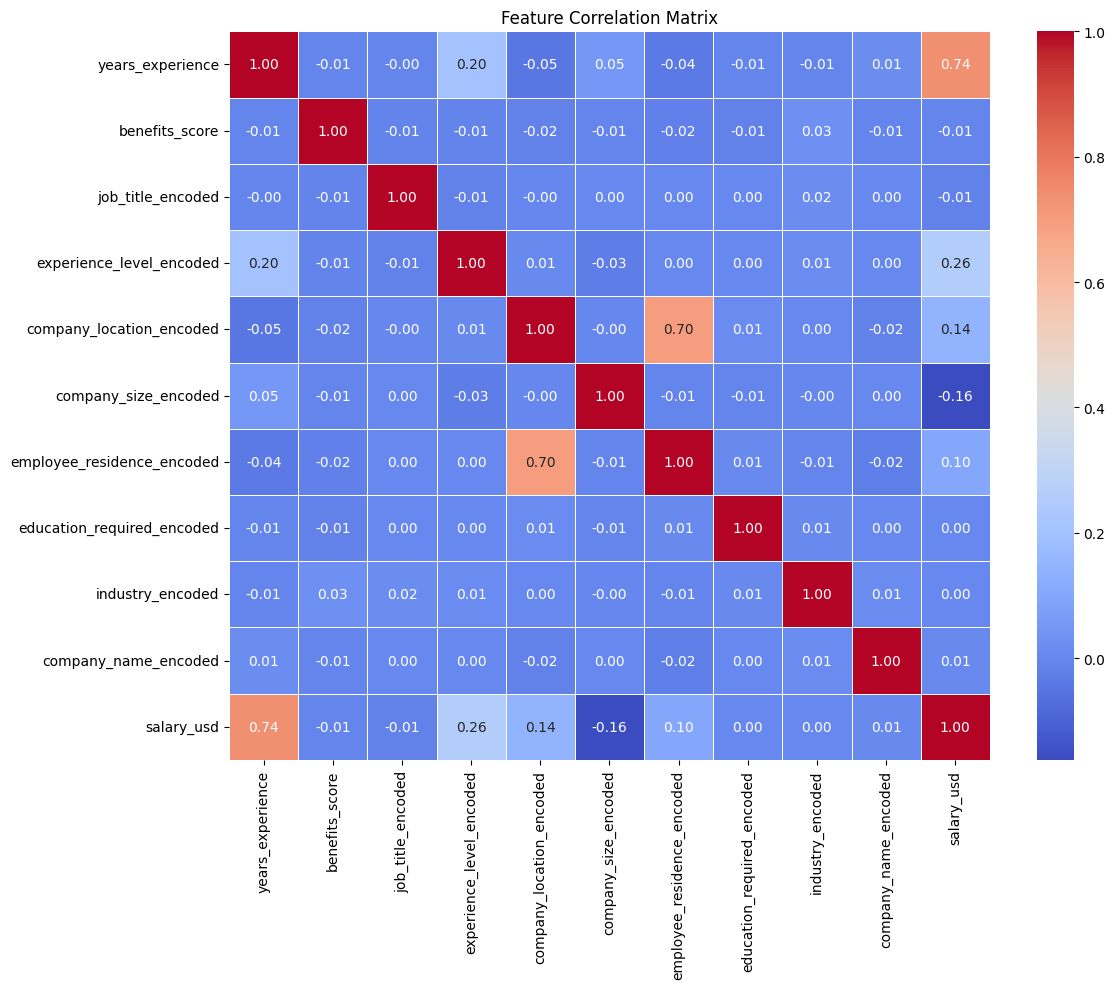

Feature correlation with target (salary_usd):
salary_usd                    1.000000
years_experience              0.736885
experience_level_encoded      0.259327
company_location_encoded      0.143377
employee_residence_encoded    0.098274
company_name_encoded          0.007823
industry_encoded              0.003117
education_required_encoded    0.002502
benefits_score               -0.005235
job_title_encoded            -0.012903
company_size_encoded         -0.162565
Name: salary_usd, dtype: float64
-------------------------------------------------------------------------------------------------------------------------------
=== Cross-Validation ===
Cross-Validation MSE: 863950218.8159 ± 15727303.2619
Cross-Validation MAE: 22833.0600 ± 175.0899
Cross-Validation R²: 0.6216 ± 0.0065
-------------------------------------------------------------------------------------------------------------------------------
=== Basic Linear Regression ===
MSE test set: 853507719.2866
MSE train set: 8

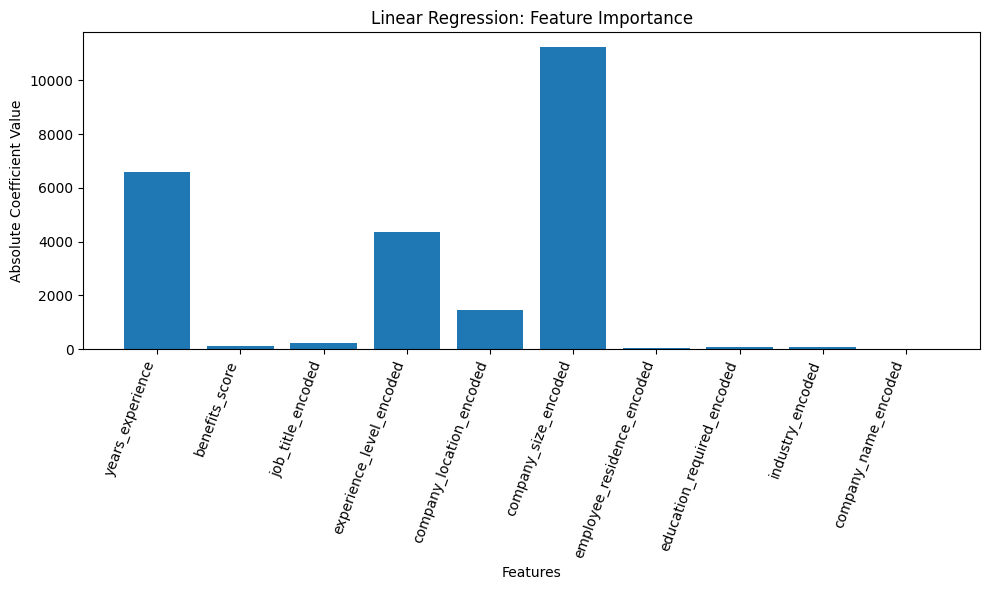

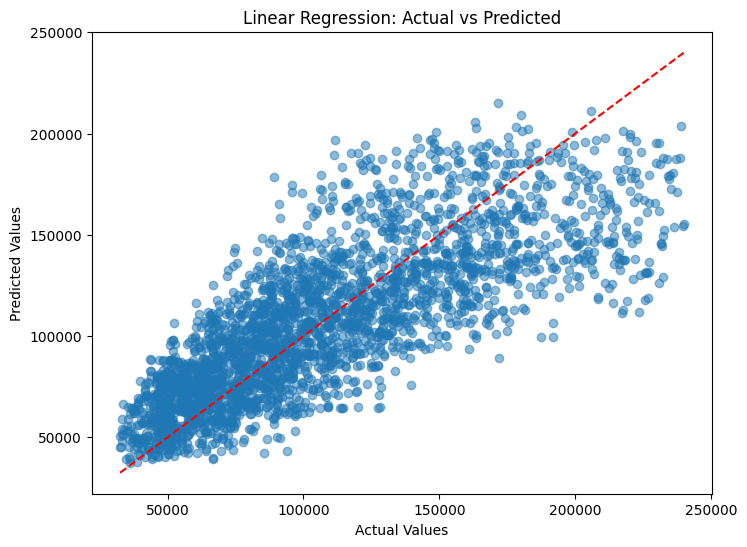

=== Scaled Linear Regression ===
MSE test set: 853507719.2866
MSE train set: 865105630.9903

R² Score test: 0.6175
R² Score train: 0.6234

MAE test set: 22816.2167
MAE train set: 22798.4131

Selected Features Coef_: ['years_experience' 'benefits_score' 'job_title_encoded'
 'experience_level_encoded' 'company_location_encoded'
 'company_size_encoded' 'employee_residence_encoded'
 'education_required_encoded' 'industry_encoded' 'company_name_encoded']
-------------------------------------------------------------------------------------------------------------------------------


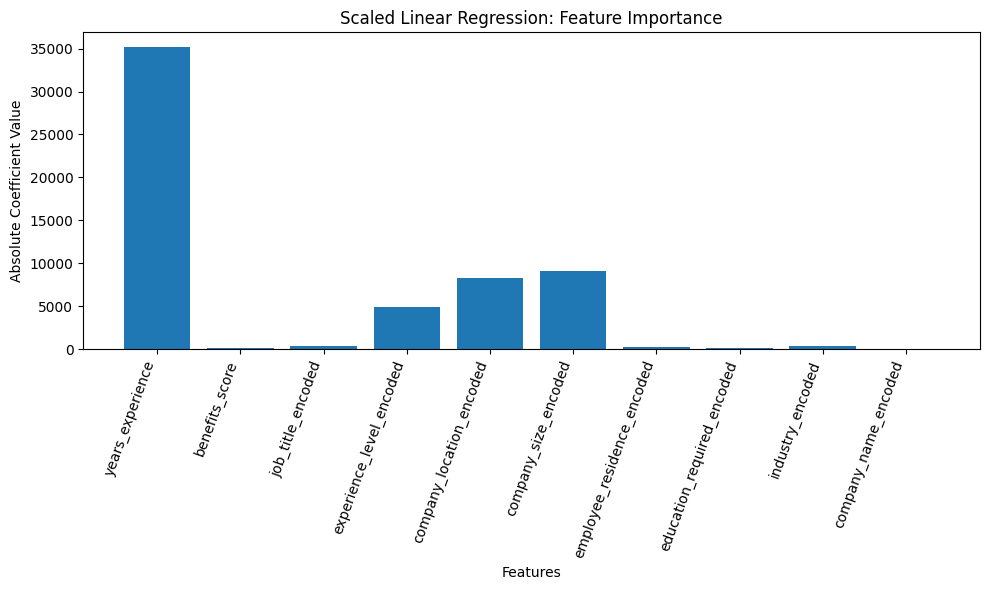

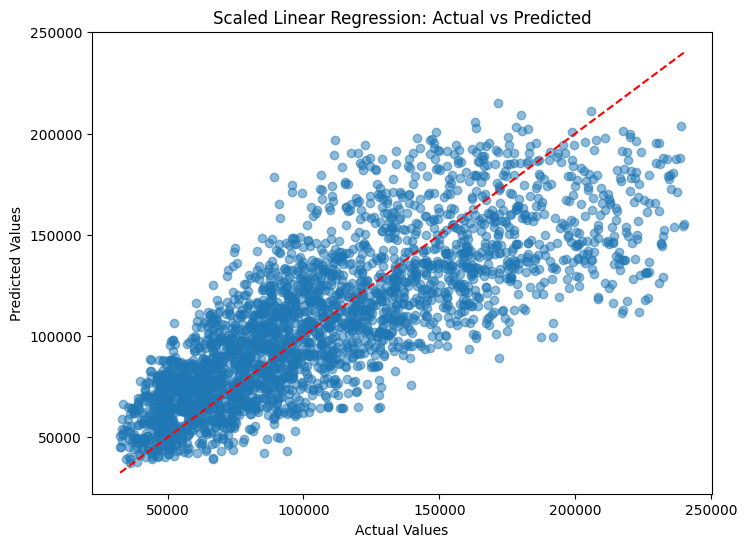

=== Feature Selection (SelectKBest) ===
MSE test set: 853232913.3386
MSE train set: 865403605.1927

R² Score test: 0.6177
R² Score train: 0.6233

MAE test set: 22816.9610
MAE train set: 22796.4918

Selected Features Selector : ['years_experience' 'experience_level_encoded' 'company_location_encoded'
 'company_size_encoded' 'employee_residence_encoded']
-------------------------------------------------------------------------------------------------------------------------------


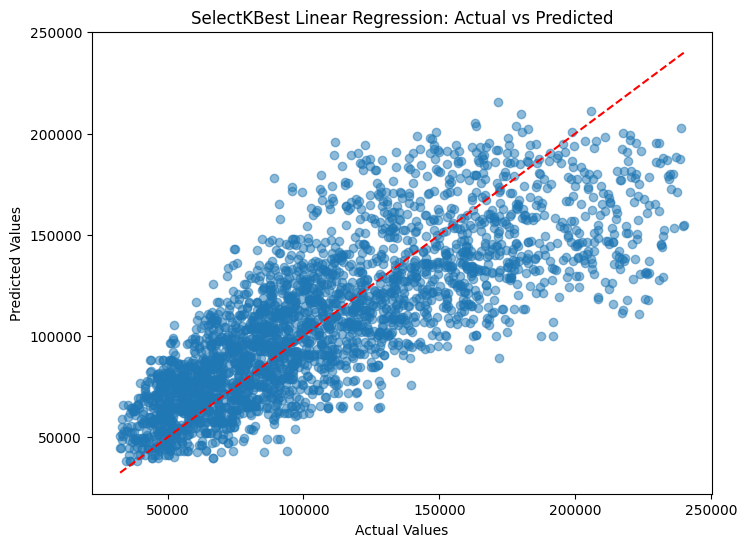

=== Feature Selection (RFE) ===
MSE test set: 853662957.4415
MSE train set: 865286316.7600

R² Score test: 0.6175
R² Score train: 0.6233

MAE test set: 22820.2578
MAE train set: 22797.4138

Selected Features Selector : ['years_experience' 'experience_level_encoded' 'company_location_encoded'
 'company_size_encoded' 'industry_encoded']
-------------------------------------------------------------------------------------------------------------------------------


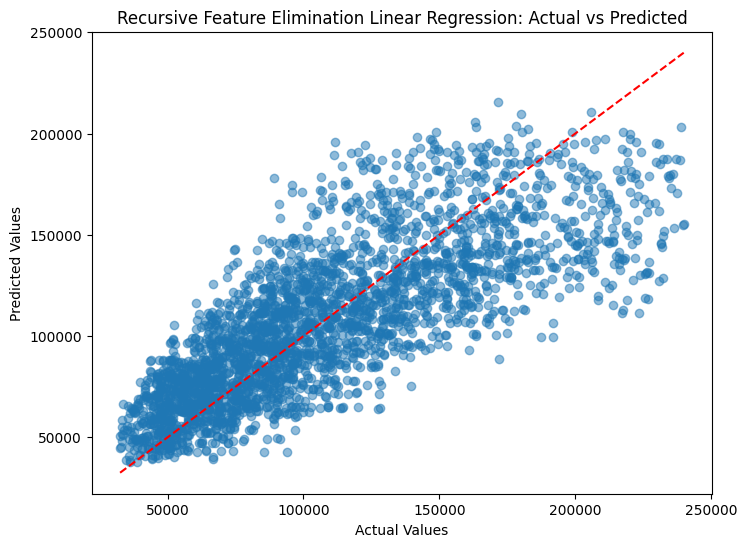

=== Polynomial Regression ===
MSE test set: 733232032.0482
MSE train set: 726970442.5616

R² Score test: 0.6714
R² Score train: 0.6835

MAE test set: 21266.7977
MAE train set: 21137.2684

Selected Features Coef_: ['years_experience' 'benefits_score' 'job_title_encoded'
 'experience_level_encoded' 'company_location_encoded'
 'company_size_encoded' 'employee_residence_encoded'
 'education_required_encoded' 'industry_encoded' 'company_name_encoded'
 'years_experience^2' 'years_experience benefits_score'
 'years_experience job_title_encoded'
 'years_experience experience_level_encoded'
 'years_experience company_location_encoded'
 'years_experience company_size_encoded'
 'years_experience employee_residence_encoded'
 'years_experience education_required_encoded'
 'years_experience industry_encoded'
 'years_experience company_name_encoded' 'benefits_score^2'
 'benefits_score job_title_encoded'
 'benefits_score experience_level_encoded'
 'benefits_score company_location_encoded'
 'benefits_s

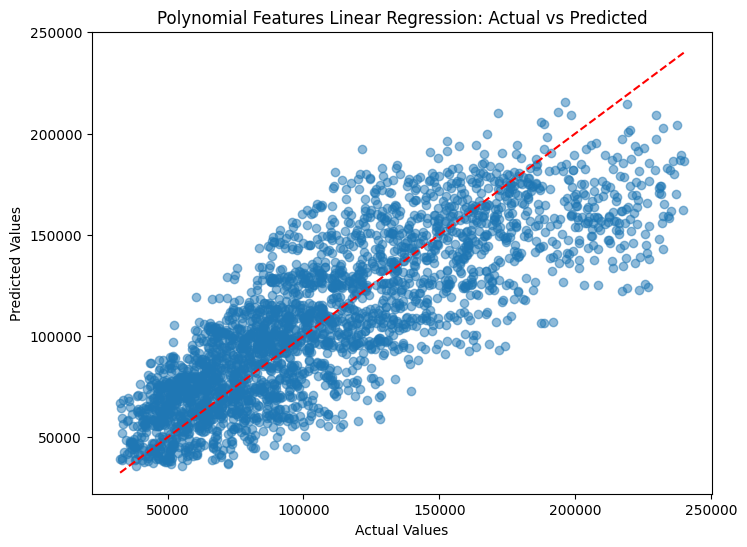

=== Ridge Regression ===
MSE test set:  853467492.2846
MSE train set: 865106787.3281

R² Score test: 0.6176
R² Score train:0.6234

MAE test set:  22816.0270
MAE train set: 22799.2531

Best alpha:    10.0000

Selected Features Coef_: ['years_experience' 'benefits_score' 'job_title_encoded'
 'experience_level_encoded' 'company_location_encoded'
 'company_size_encoded' 'employee_residence_encoded'
 'education_required_encoded' 'industry_encoded' 'company_name_encoded']
-------------------------------------------------------------------------------------------------------------------------------


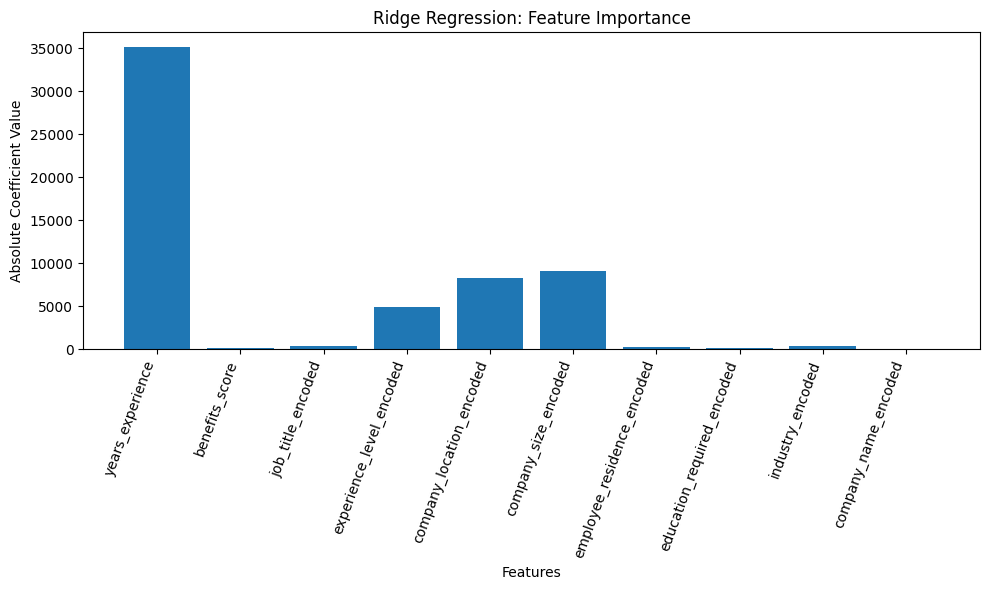

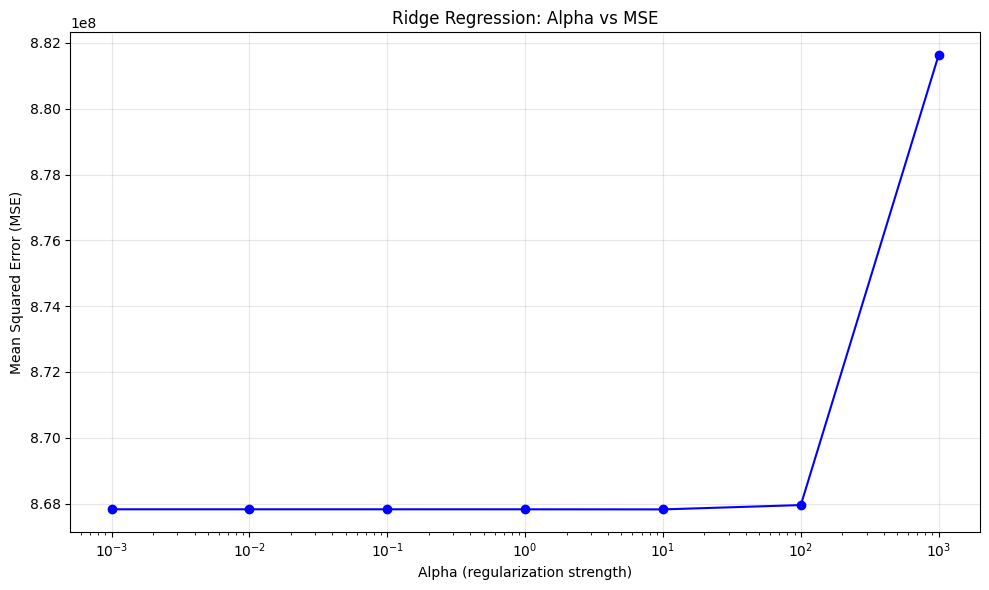

=== Lasso Regression ===
MSE test set: 853472526.2436
MSE train set: 865106511.7703

R² Score test: 0.6176
R² Score train: 0.6234

MAE test set: 22816.0443
MAE train set: 22798.5323

Best alpha: 10.0

Selected features: ['years_experience' 'benefits_score' 'job_title_encoded'
 'experience_level_encoded' 'company_location_encoded'
 'company_size_encoded' 'employee_residence_encoded'
 'education_required_encoded' 'industry_encoded' 'company_name_encoded']
-------------------------------------------------------------------------------------------------------------------------------


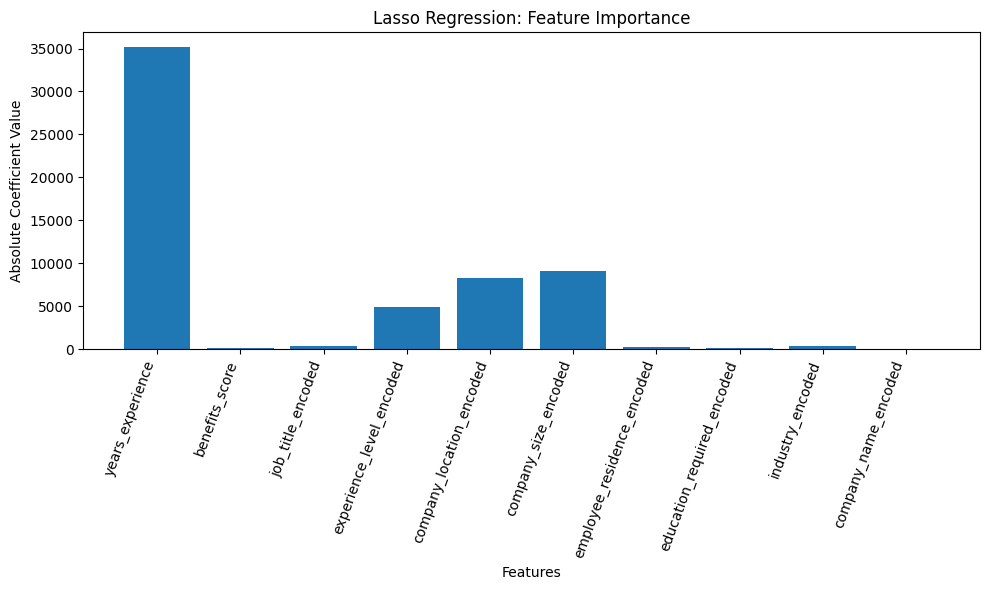

=== Elastic Net Regression ===
MSE test set: 853461660.1888
MSE train set: 865107149.3064

R² Score test: 0.6176
R² Score train: 0.6234

MAE test set: 22816.0024
MAE train set: 22799.3746

Best parameters: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.99}

Selected Features Coef_: ['years_experience' 'benefits_score' 'job_title_encoded'
 'experience_level_encoded' 'company_location_encoded'
 'company_size_encoded' 'employee_residence_encoded'
 'education_required_encoded' 'industry_encoded' 'company_name_encoded']
-------------------------------------------------------------------------------------------------------------------------------


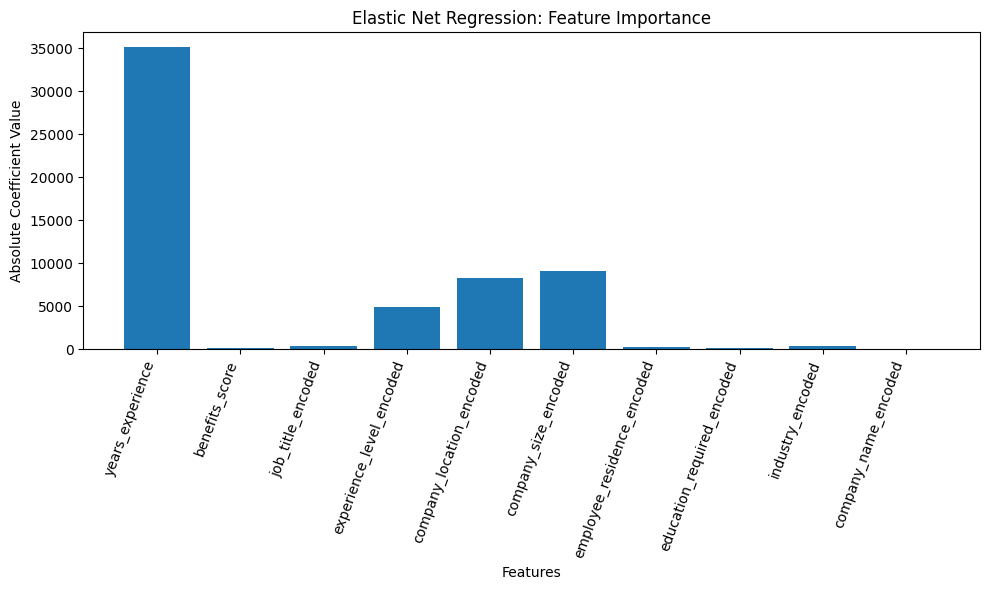

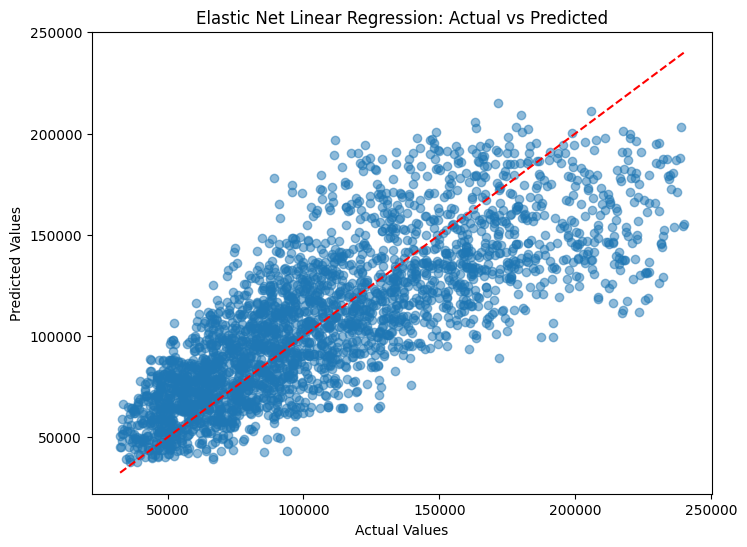

-------------------------------------------------------------------------------------------------------------------------------
=== Model Comparison ===
                                    MAE       MSE            R²
Polynomial Regression      7.332320e+08  0.671434  21266.797658
Feature Selection (KBest)  8.532329e+08  0.617661  22816.961046
Elastic Net                8.534617e+08  0.617559  22816.002356
Ridge Regression           8.534675e+08  0.617556  22816.026992
Lasso Regression           8.534725e+08  0.617554  22816.044299
Basic Linear Regression    8.535077e+08  0.617538  22816.216665
Scaled Linear Regression   8.535077e+08  0.617538  22816.216665
Feature Selection (RFE)    8.536630e+08  0.617468  22820.257783
-------------------------------------------------------------------------------------------------------------------------------
Best model according to MAE: Polynomial Regression
Best model according to MSE: Polynomial Regression
Best model according to RMSE: Polynomial 

In [56]:
# Set random seed for reproducibility
np.random.seed(42)

# Training & Splitting
X = df.drop(columns=['salary_usd'], axis=1)
y = df['salary_usd']

print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print() 

# For short dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

# Basic Linear Regression model
def basic_linear_regression():
    print("=== Basic Linear Regression ===")
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n") 
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    
    # Check which features were selected (non-zero coefficients)
    lr_coef = model.coef_
    selected_features = np.array(X_train.columns)[lr_coef != 0]
    print(f"\nSelected features: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Linear Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Linear Regression: Actual vs Predicted')
    plt.show()

    return model, mse_test, r2_test, mae_test

# Feature Scaling
def scaled_linear_regression():
    print("=== Scaled Linear Regression ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    # Check which features were selected (non-zero coefficients)
    scaled_lr_coef = pipeline.named_steps['regression'].coef_
    selected_features = np.array(X_train.columns)[scaled_lr_coef != 0]
    print(f"Selected Features Coef_: {selected_features}") 
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(scaled_lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Scaled Linear Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scaled Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Feature Selection with SelectKBest
def feature_selection_kbest():
    print("=== Feature Selection (SelectKBest) ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest(f_regression, k=5)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train) 

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    selected_features = np.array(X_train.columns)[pipeline.named_steps['selector'].get_support()]
    print(f"Selected Features Selector : {selected_features}")
    print("-" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('SelectKBest Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Feature Selection with Recursive Feature Elimination (RFE)
def feature_selection_rfe():
    print("=== Feature Selection (RFE) ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('selector', RFE(LinearRegression(), n_features_to_select=5)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    
    selected_features = np.array(X_train.columns)[pipeline.named_steps['selector'].get_support()]
    print(f"Selected Features Selector : {selected_features}") 
    print("-" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Recursive Feature Elimination Linear Regression: Actual vs Predicted')
    plt.show() 
    
    return pipeline, mse_test, r2_test, mae_test

# Polynomial Features
def polynomial_regression():
    print("=== Polynomial Regression ===")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('regression', LinearRegression())
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_train = pipeline.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}") 

    # Get the polynomial feature names
    poly_features = pipeline.named_steps['poly'].get_feature_names_out(X_train.columns)
    
    # Get coefficients from the regression step
    poly_coef = pipeline.named_steps['regression'].coef_
    
    # Find selected features (non-zero coefficients)
    selected_features = poly_features[poly_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("-" * 127)
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Polynomial Features Linear Regression: Actual vs Predicted')
    plt.show()  
    
    return pipeline, mse_test, r2_test, mae_test

# Regularized Linear Regression - Ridge
def ridge_regression():
    print("=== Ridge Regression ===")
    param_grid = {'ridge__alpha': np.logspace(-3, 3, 7)}
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(random_state=42))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)
    
    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set:  {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train:{r2_train:.4f}\n")
    print(f"MAE test set:  {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")
    print(f"Best alpha:    {grid_search.best_params_['ridge__alpha']:.4f}")
  
    # Check which features were selected (non-zero coefficients)
    ridge_lr_coef = grid_search.best_estimator_['ridge'].coef_
    selected_features = np.array(X_train.columns)[ridge_lr_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(ridge_lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Ridge Regression: Feature Importance')
    plt.tight_layout()
    plt.show() 
    
    # Visualize alpha vs MSE
    plt.figure(figsize=(10, 6))
    results = pd.DataFrame(grid_search.cv_results_)
    alphas = np.array(param_grid['ridge__alpha'])
    scores = -results['mean_test_score']
    plt.semilogx(alphas, scores, 'b-o')
    plt.xlabel('Alpha (regularization strength)')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Ridge Regression: Alpha vs MSE')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return best_model, mse_test, r2_test, mae_test

# Regularized Linear Regression - Lasso
def lasso_regression():
    print("=== Lasso Regression ===")
    param_grid = {'lasso__alpha': np.logspace(-3, 1, 5)}
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', Lasso(random_state=42, max_iter=10000))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")   
    print(f"Best alpha: {grid_search.best_params_['lasso__alpha']}") 
    
    # Check which features were selected (non-zero coefficients)
    lasso_coef = best_model.named_steps['lasso'].coef_
    selected_features = np.array(X_train.columns)[lasso_coef != 0]
    print(f"\nSelected features: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(lasso_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Lasso Regression: Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return best_model, mse_test, r2_test, mae_test

# Elastic Net
def elastic_net_regression():
    print("=== Elastic Net Regression ===")
    param_grid = {
        'elasticnet__alpha': np.logspace(-3, 1, 5),
        'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99]
    }
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('elasticnet', ElasticNet(random_state=42, max_iter=10000))
    ])
    
    grid_search = GridSearchCV(
        pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1
    )
    
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train) 

    # Evaluate the model
    mse_test = mean_squared_error(y_test, y_pred)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    print(f"MSE test set: {mse_test:.4f}")
    print(f"MSE train set: {mse_train:.4f}\n")
    print(f"R² Score test: {r2_test:.4f}")
    print(f"R² Score train: {r2_train:.4f}\n")
    print(f"MAE test set: {mae_test:.4f}")
    print(f"MAE train set: {mae_train:.4f}\n")    
    print(f"Best parameters: {grid_search.best_params_}")

    # Check which features were selected (non-zero coefficients)
    elastic_lr_coef = grid_search.best_estimator_['elasticnet'].coef_
    selected_features = np.array(X_train.columns)[elastic_lr_coef != 0]
    print(f"\nSelected Features Coef_: {selected_features}")
    print("-" * 127) 
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(X_train.columns, np.abs(elastic_lr_coef))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Features')
    plt.ylabel('Absolute Coefficient Value')
    plt.title('Elastic Net Regression: Feature Importance')
    plt.tight_layout()
    plt.show()  
    
    # Visualize predictions vs actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Elastic Net Linear Regression: Actual vs Predicted')
    plt.show() 
    print("-" * 127) 
    
    return best_model, mse_test, r2_test, mae_test

# Cross-validation with MAE, MSE, and R² scores
def cross_validation_example():
    print("-" * 127)
    print("=== Cross-Validation ===")
    model = Pipeline([
        ('scaler', StandardScaler()),
        ('regression', LinearRegression())
    ])
    
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Calculate different metrics
    mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    rmse_scores = np.sqrt(mse_scores)
    
    print(f"Cross-Validation MSE: {mse_scores.mean():.4f} ± {mse_scores.std():.4f}")
    print(f"Cross-Validation MAE: {mae_scores.mean():.4f} ± {mae_scores.std():.4f}")
    print(f"Cross-Validation R²: {r2_scores.mean():.4f} ± {r2_scores.std():.4f}")
    print("-" * 127) 
    
    return mse_scores, mae_scores, r2_scores, rmse_scores
        
# Compare all models
def compare_models():
    models = {
        'Basic Linear Regression': basic_linear_regression(),
        'Scaled Linear Regression': scaled_linear_regression(),
        'Feature Selection (KBest)': feature_selection_kbest(),
        'Feature Selection (RFE)': feature_selection_rfe(),
        'Polynomial Regression': polynomial_regression(),
        'Ridge Regression': ridge_regression(),
        'Lasso Regression': lasso_regression(),
        'Elastic Net': elastic_net_regression()
    }

    # Extract MSE and R² scores
    results = {name: {'MAE': mae_scores, 'MSE': mse_scores, 'R²': r2_scores} 
           for name, (_, mae_scores, mse_scores, r2_scores) in models.items()} 

    results_df = pd.DataFrame(results).T
    
    # Sort by MSE (lower is better)
    results_df = results_df.sort_values('MSE', ascending=False)
    
    print("=== Model Comparison ===")
    print(results_df)
    print("-" * 127) 
    
    return results_df 

    # Plot comparison
    plt.figure(figsize=(12, 15))  # Increase height for 3 subplots

    plt.subplot(3, 1, 1)  # This now works with 3 rows
    plt.bar(results_df.index, results_df['MAE'])
    plt.xticks(rotation=70, ha='right')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Model Comparison - MAE (lower is better)')
    
    plt.subplot(3, 1, 2)  # Change to 3 rows
    plt.bar(results_df.index, results_df['MSE'])
    plt.xticks(rotation=70, ha='right')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.title('Model Comparison - MSE (lower is better)')
    
    plt.subplot(3, 1, 3)  # Change to 3 rows
    plt.bar(results_df.index, results_df['R²'])
    plt.xticks(rotation=70, ha='right')
    plt.ylabel('R² Score (higher is better)')
    plt.title('Model Comparison - R² (higher is better)')

    plt.tight_layout()
    plt.show()
    
# Feature Correlation Analysis
def feature_correlation_analysis():
    print("=== Feature Correlation Analysis ===")
    X_df = pd.DataFrame(df, columns=X_train.columns)  # Always change the df value based on the df's name you're using
    X_df['salary_usd'] = y_train  # Always change the X_df value 
    
    corr = X_df.corr()
    
    # Plot correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Sort features by correlation with target
    target_corr = corr['salary_usd'].sort_values(ascending=False) # Always change the target_coor value 
    print("Feature correlation with target (salary_usd):")  # Always change the variable value 
    print(target_corr)
    
    return corr

# Main execution
if __name__ == "__main__":
    print("=== Linear Regression Tuning Examples ===")
    feature_correlation_analysis()
    cross_validation_example()
    results = compare_models()
    
    print(f"Best model according to MAE: {results.index[0]}")
    print(f"Best model according to MSE: {results.index[0]}")
    print(f"Best model according to RMSE: {results.index[0]}")
    print(f"Best model according to R2_score: {results.index[0]}")
    print("-" * 127) 

In [63]:
print(f"The best model for AI Jobs Dataset is {results.index[0]} with a Mean Squared Error of {results.iloc[0]['MSE']}")

The best model for AI Jobs Dataset is Polynomial Regression with a Mean Squared Error of 0.6714341704045247
